In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import urllib.request
import numpy as np
import pandas as pd
import seaborn as sns
import csv
import requests
from sys import *

import IPython
import matplotlib as mpl

import matplotlib
import matplotlib.gridspec as gridspec
from matplotlib.offsetbox import OffsetImage
from matplotlib.patches import Circle, Rectangle, Arc

In [2]:
# Read the statsr
def load_frames():
    """
    This function loads all the necessary frames for the upcoming data analysis.
    
    Parameters:
    None
    
    Returns:
    List: The list of required dataframes
    """
    data_frame = pd.read_csv('./create/CSV/data.csv')
    seasons = pd.read_csv('./create/CSV/nba-players-stats/Seasons_Stats.csv')
    col=np.array(['TRB', 'PTS', 'STL','BLK','AST'])
    labels = np.array(['                Rebound', 'Points', 'Steal','Block','Assist'])
    careerstats = pd.read_csv('./create/CSV/careerstats.csv')
    shotselection = pd.read_csv('./create/CSV/shotselection.csv')
    
    return [data_frame, seasons, col, labels,careerstats, shotselection ]

In [3]:
def create_scenario_map():
    """
    This function creates the neccessary Scenario Map for our Game 7 Finals Championship.
    
    Parameters:
    None
    
    Returns:
    None
    """
      
    # For scenario map
    kobePic = urllib.request.urlretrieve('https://ak-static.cms.nba.com/wp-content/uploads/headshots/nba/1610612747/2015/260x190/977.png',
                                    "977.png")
    kobe = plt.imread(kobePic[0])

    leBronPic = urllib.request.urlretrieve('https://ak-static.cms.nba.com/wp-content/uploads/headshots/nba/1610612747/2019/260x190/2544.png', "2544.png")
    leBron = plt.imread(leBronPic[0])

    michaelPic = urllib.request.urlretrieve('https://ak-static.cms.nba.com/wp-content/uploads/headshots/nba/latest/260x190/893.png',
                           "893.png")
    michael = plt.imread(michaelPic[0])

    shaqPic = urllib.request.urlretrieve('https://ak-static.cms.nba.com/wp-content/uploads/headshots/nba/latest/260x190/406.png',
                                     "406.png")
    shaq = plt.imread(shaqPic[0])

    anonymousPic = urllib.request.urlretrieve('http://s3.amazonaws.com/37assets/svn/765-default-avatar.png',
                                          "765-default-avatar.png")
    anonymous = plt.imread(anonymousPic[0])
        
    #Draw Court
    fig, ax = plt.subplots(figsize=(12, 11))
    ax = draw_court()

    # Kobe Image
    kobeImg = OffsetImage(kobe, zoom=0.4)
    kobeImg.set_offset((500,350))

    # Lebron Image
    leBronImg = OffsetImage(leBron, zoom=0.4)
    leBronImg.set_offset((100,500))

    # Michael Image
    michaelImg = OffsetImage(michael, zoom=0.4)
    michaelImg.set_offset((130,350))

    # Shaq Image
    shaqImg = OffsetImage(shaq, zoom=0.4)
    shaqImg.set_offset((400,500))

    # player image
    anonymousImg = OffsetImage(anonymous, zoom=0.15)
    anonymousImg.set_offset((325,220))

    ax.add_artist(kobeImg)
    ax.add_artist(leBronImg)
    ax.add_artist(michaelImg)
    ax.add_artist(shaqImg)
    ax.add_artist(anonymousImg)

    plt.xlim(-250,250)
    plt.ylim(422.5, -47.5)

    plt.show()

In [4]:
def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    """
    This Function Draws the necessary court for the upcoming data Analysis.
    
    Parameters:
    None
    
    Returns:
    None
    
    """
    
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax


In [5]:
# single shot map, might not need.
def create_shot_map(dataframe, title):
    """
    This function Creates a single Heat Map of shot locations from dataframe
    
    Parameters:
    dataframe: pd.DataFrame for shot map locations of x and y coordinates
    title: string that gives the heat map the current title.
    
    Returns:
    None
    
    """
    
    
    x = dataframe['loc_x']
    y = dataframe['loc_y']
    xmin = x.min()
    xmax = x.max()
    ymin = y.min()
    ymax = y.max()


    fig, ax = plt.subplots(figsize=(8, 6))

    # Set axis
    # Set legend

    hb = ax.hexbin(x, y, gridsize=30, bins='log', cmap='YlOrRd',mincnt = 1, edgecolor='grey')
    ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
    cb = fig.colorbar(hb, ax=ax)
    ax = draw_court(outer_lines = True)
    ax.set_title(title)


    plt.xlim(-250,250)
    plt.ylim(422.5, -47.5)
    plt.show()

In [6]:
def create_shot_maps(data_frame, seasons):
    """
    This function creates the entire shot map needed for the data analysis
    
    Parameters:
    data_frame: The Dataframe to analyze.
    seasons: The list of seasons to name each season in the heatmap
    
    Returns:
    None
    
    """
    
    # Grabs the first season
    kb_first_year_bool = data_frame['season'] =='1996-97'
    kb_first_year_df = data_frame[kb_first_year_bool]

    #Grabs the championship season'''
    # 1999-00 with Los Angeles Lakers : kb_1_c_df
    kb_1_c_bool = data_frame['season'] == '1999-00'
    kb_1_c_df = data_frame[kb_1_c_bool]

    # 2000-01 with Los Angeles Lakers : kb_2_c_df
    kb_2_c_bool = data_frame['season'] == '2000-01'
    kb_2_c_df = data_frame[kb_2_c_bool]

    # 2001-02 with Los Angeles Lakers : kb_3_c_df
    kb_3_c_bool = data_frame['season'] == '2001-02'
    kb_3_c_df = data_frame[kb_3_c_bool]

    # 2008-09 with Los Angeles Lakers : kb_4_c_df
    kb_4_c_bool = data_frame['season'] == '2008-09'
    kb_4_c_df = data_frame[kb_4_c_bool]

    # 2009-10 with Los Angeles Lakers : kb_5_c_df
    kb_5_c_bool = data_frame['season'] == '2009-10'
    kb_5_c_df = data_frame[kb_5_c_bool]

    # Grabs the last season
    # 2015-16 with Los Angeles Lakers : kb_15_c_df
    kb_15_c_bool = data_frame['season'] == '2015-16'
    kb_15_c_df = data_frame[kb_15_c_bool]

    #00-01, 05-06, 10-11, 15-16
    kb_5_bool = data_frame['season'] == '2005-06'
    kb_5_df = data_frame[kb_5_bool]

    kb_10_bool = data_frame['season'] == '2010-11'
    kb_10_df = data_frame[kb_10_bool]

    kb_15_bool = data_frame['season'] == '2015-16'
    kb_15_df = data_frame[kb_15_bool]
    
    # 1st, 5th, 10th, 15th, 20th seasons
    create_shot_map(kb_first_year_df, "Kobe Bryant - First Season 1996-97")
    create_shot_map(kb_2_c_df, "Kobe Bryant - 5th Season 2000-01")
    create_shot_map(kb_5_df, "Kobe Bryant - 10th Season 2005-06")
    create_shot_map(kb_10_df, "Kobe Bryant - 15th Season 2010-11")
    create_shot_map(kb_15_df, "Kobe Bryant - 20th Season 2015-16")
    create_shot_map(data_frame, "Kobe Bryant - All Seasons")
    #create_shot_map(kb_15_c_df, "Kobe Bryant Last Season 2015-16")    
    
    # Championship seasons
    create_shot_map(kb_1_c_df, "Kobe Bryant - First Championship 1999-00")
    create_shot_map(kb_2_c_df, "Kobe Bryant - Second Championship 2000-01")
    create_shot_map(kb_3_c_df, "Kobe Bryant - Third Championship ( Three Peat ) 2001-02")
    create_shot_map(kb_4_c_df, "Kobe Bryant - Fourth Championship 2008-09")
    create_shot_map(kb_5_c_df, "Kobe Bryant - Fifth Championship 2009-10")

In [7]:
def plot_pie_charts(kaggle):
    '''
    The function plots the pie charts of shot type distribution and quarter distribution.
    '''
    lakers_yellow = (253/255,186/255,33/255)
    lakers_purple = (85/255,32/255,132/255)
    # Number of shot attempts per quarter whole career
    first_q = (kaggle['period'] == 1).sum()
    second_q = (kaggle['period'] == 2).sum()
    third_q = (kaggle['period'] == 3).sum()
    fourth_q = (kaggle['period'] == 4).sum()
    total_q = first_q + second_q + third_q + fourth_q
    sizes_pie = [100*first_q,100*second_q,100*third_q,100*fourth_q] / total_q
    
    # Plot pie chart of shot selection by quarter
    labels = ['1st Qtr.','2nd Qtr','3rd Qtr','4th Qtr']
    sizes = sizes_pie
    fig3, ax3 = plt.subplots(figsize=(10,10))
    _, texts, autotexts =ax3.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90, 
            colors = (lakers_yellow,lakers_purple,lakers_yellow,lakers_purple))
    for autotext in autotexts:
        autotext.set_fontsize(20)
    autotexts[1].set_color('white')
    autotexts[3].set_color('white')
    for text in texts:
        text.set_fontsize(20)
    ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Distribution of Shot Attempts per Quarter',fontsize=25)
    plt.show()

    # Shot distance throughout whole career
    labels = ['Close Range','Mid Range','Three Pointer']
    close_range = (kaggle['shot_zone_range'] == 'Less Than 8 ft.').sum()
    mid_range = (kaggle['shot_type'] == '2PT Field Goal').sum() - close_range
    three_pt = (kaggle['shot_type'] == '3PT Field Goal').sum()
    total_shot = close_range + mid_range + three_pt
    sizes_shots_pie = [100*close_range,100*mid_range,100*three_pt] / total_shot
    sizes = sizes_shots_pie
    
    # Plot pie chart of shot distance
    fig1, ax1 = plt.subplots(figsize=(10,10))
    patches, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90, 
            colors=(lakers_yellow,lakers_purple,(211/255,211/255,211/255)))
    plt.legend(patches, ['Close range: <8 ft.','Mid range: 8-16 ft.','Three Pointer: >24 ft.'], loc=(-0.2,0),fontsize=15)
    for autotext in autotexts:
        autotext.set_fontsize(20)
    autotexts[1].set_color('white')
    for text in texts:
        text.set_fontsize(20)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Distribution of Shot Distance',fontsize=25)
    plt.show()
    
    # Shot types
    shottype = np.array(list(set(kaggle['combined_shot_type'])))
    attempts = []
    for type in shottype:
        nshot = len(kaggle[kaggle['combined_shot_type']==type])
        attempts.append(nshot)

    # Plot pie chart of shot types
    import plotly.graph_objects as go
    grey='rgb(211,211,211)'
    yellow = 'rgb(253,186,33)'
    purple = 'rgb(85,32,132)'
    fig = go.Figure(data=[go.Pie(labels=shottype, values=attempts, pull=[0, 0, 0, 0.2,0,0])])
    fig.update_traces(textinfo='percent+label',marker=dict(colors=[purple,grey,yellow,purple,grey,yellow]))
    fig.update_layout(title={'text': 'Shot Types',
                             'y':0.85,
                             'x':0.52,
                             'xanchor': 'center',
                             'yanchor': 'top'})
    fig.show()

In [8]:
def plot_shot_timings(kaggle):
    '''
    The function plots the histogram of shot attempts vs the time of the shot
    '''
    lakers_yellow = (253/255,186/255,33/255)
    lakers_purple = (85/255,32/255,132/255)
    # Plot shot attempts as a function of time remaining during the game
    kaggle['seconds_from_period_start'] = 720 - 60*kaggle['minutes_remaining'] - kaggle['seconds_remaining']
    
    plt.rcParams['figure.figsize'] = (8,8)
    plt.rcParams['font.size'] = 8
    
    bin_size = 24
    
    for p in range(4):
        plt.figure();
        timeBins = np.arange(0,60*12+bin_size,bin_size)+0.01
        attemptsAsFunctionOfTime, b = np.histogram(kaggle[kaggle['period'] == p+1]['seconds_from_period_start'], bins=timeBins)     
            
        maxHeight = max(attemptsAsFunctionOfTime) + 30
        barWidth = 0.999*(timeBins[1]-timeBins[0])
        plt.subplot(4,1,p+1);
        plt.bar(timeBins[:-1],attemptsAsFunctionOfTime, align='edge', width=barWidth,color=lakers_purple)
        plt.vlines(x=[0,12*60],ymin=0,ymax=maxHeight,colors=lakers_yellow)
        plt.xlim((-20,740)); plt.ylim((0,maxHeight)); plt.ylabel('Shot attempts')
        plt.xlabel('Seconds Remaining Until End of Quarter ' + str(p+1))    




In [9]:
def plot_season_graphs(stats):
    '''
    The function plots FG%, Personal Foul and 3 Points Attempted per season.
    '''
    lakers_yellow = (253/255,186/255,33/255)
    lakers_purple = (85/255,32/255,132/255)
    # Plot FG% per season
    ax = plt.figure(figsize=(12, 6))
    plt.plot(stats['Season'].iloc[:-1],stats['FG%'].iloc[:-1],'o-',color = lakers_purple, markersize=10)
    plt.plot(stats['Season'].iloc[[3,4,5,12,13]],stats['FG%'].iloc[[3,4,5,12,13]],'o',color = lakers_yellow, markersize=15)
    plt.xticks(rotation=30)
    plt.legend(('Regular Season','Champion Season'),fontsize=14)
    plt.title('Field Goal% vs. Season',fontsize=20)
    plt.ylabel('Field Goal%')
    plt.xlabel('Season')
    plt.grid()
    
    # Plot Personal Foul per season
    ax = plt.figure(figsize=(12, 6))
    plt.plot(stats['Season'].iloc[:-1],stats['PF'].iloc[:-1],'-o',color = lakers_purple)
    plt.xticks(rotation=30)
    plt.title('Personal Foul vs. Season',fontsize=20)
    plt.ylabel('Personal Foul')
    plt.xlabel('Season')
    plt.grid()
    
    # Plot Three Points Attempted per season
    nba3pa = [16.8,12.7,13.2,13.7,13.7,14.7,14.7,14.9,15.8,16,16.9,18.1,18.1,18.1,18,18.4,20,21.5,22.4,24.1]
    plt.figure(figsize = (12,7))
    plt.xticks(rotation = 30)
    plt.title('3 Points Attempted per Game by Kobe Bryant and NBA Teams',fontsize = 20)
    plt.plot(stats['Season'].iloc[:-1],stats['3PA'].iloc[:-1],'-o',color=lakers_purple)
    plt.plot(stats['Season'].iloc[:-1],nba3pa,'-o',color=lakers_yellow)
    plt.legend(('Kobe Bryant','NBA Average'),loc='upper left',fontsize=16)
    plt.grid()
    plt.show()



In [10]:
def plot_radar(stats, col, labels):
    '''Compute radar charts'''
    seasons = stats['Season']
    for i in range(len(stats)-1):
        if i==17:
            continue
        if i in [3,4,5,12,13]:
            seasoncolor = (253/255,186/255,33/255)
        else:
            seasoncolor = (85/255,32/255,132/255)
        #getting data
        plotstats=stats.loc[i,col]
        #getting ranges of axes
        ranges = getrange(stats,col)
        #plotting
        fig1 = plt.figure(figsize=(4,4))
        radar = ComplexRadar(fig1, labels, ranges, title ='Season {}'.format(seasons[i]),color=seasoncolor)
        radar.plot(plotstats)
        radar.fill(plotstats, alpha=0.2)
        plt.show()


In [11]:
def getrange(stats,col):
    '''Get the range of data'''
    out = [(0,np.ceil(max(stats[name]))) for name in col]
    return out

In [12]:
def _invert(x, limits):
    """inverts a value x on a scale from
    limits[0] to limits[1]"""
    return limits[1] - (x - limits[0])

In [13]:
def _scale_data(data, ranges):
    """scales data[1:] to ranges[0],
    inverts if the scale is reversed"""
    for d, (y1, y2) in zip(data[1:], ranges[1:]):
        assert (y1 <= d <= y2) or (y2 <= d <= y1)
    x1, x2 = ranges[0]
    d = data[0]
    if x1 > x2:
        d = _invert(d, (x1, x2))
        x1, x2 = x2, x1
    sdata = [d]
    for d, (y1, y2) in zip(data[1:], ranges[1:]):
        if y1 > y2:
            d = _invert(d, (y1, y2))
            y1, y2 = y2, y1
        sdata.append((d-y1) / (y2-y1) 
                     * (x2 - x1) + x1)
    return sdata

In [14]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

class ComplexRadar():
    """
    This class helps the functionality of creating radar charts.
    """
    def __init__(self, fig, variables, ranges,
                 n_ordinate_levels=4, title='',color=(85/255,32/255,132/255)):
        angles = np.arange(0, 360, 360./len(variables))

        axes = [fig.add_axes([0.1,0.1,0.9,0.9],polar=True,
                label = "axes{}".format(i))
                for i in range(len(variables))]
        l, text = axes[0].set_thetagrids(angles, 
                                         labels=variables)
        [txt.set_rotation(angle-90) for txt, angle
             in zip(text, angles)]
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.grid("off")
            ax.xaxis.set_visible(False)
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i], 
                               num=n_ordinate_levels)
            gridlabel = ["{}".format(round(x,2)) 
                         for x in grid]
            if ranges[i][0] > ranges[i][1]:
                grid = grid[::-1] # hack to invert grid
                          # gridlabels aren't reversed
            gridlabel[0] = "" # clean up origin
            ax.set_rgrids(grid, labels=gridlabel,
                         angle=angles[i])
            #ax.spines["polar"].set_visible(False)
            ax.set_ylim(*ranges[i])
        # variables for plotting
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
        self.title = title
        self.color = color
    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw,color = self.color)
        self.ax.set_title(self.title)
    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw,color = self.color)
        


In [15]:
def main():
    """
    This is the main function to call for analysis.
    
    """
    # Return needed Data Frames to analyze
    data_frame, seasons, col, labels, stats, kaggle = load_frames()

    # Create the maps now
    create_shot_maps(data_frame,seasons)
    create_scenario_map()
    
    # Create the Plots
    plot_season_graphs(stats)
    plot_pie_charts(kaggle)
    plot_shot_timings(kaggle)
    plot_radar(stats, col, labels)

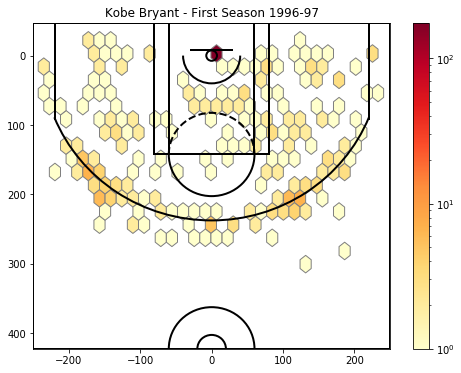

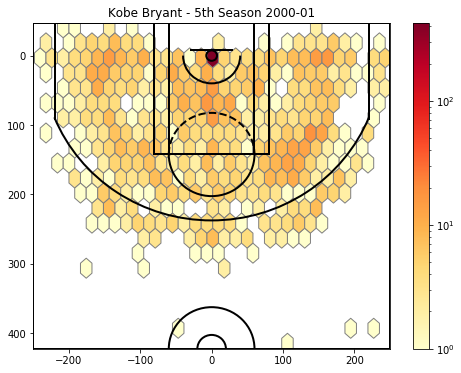

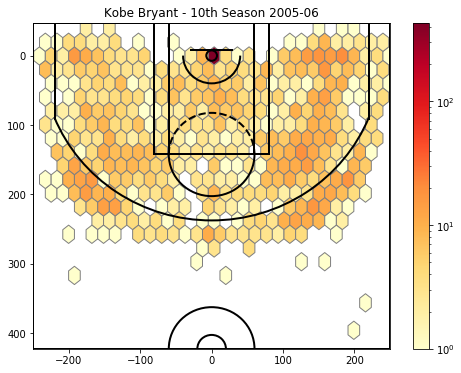

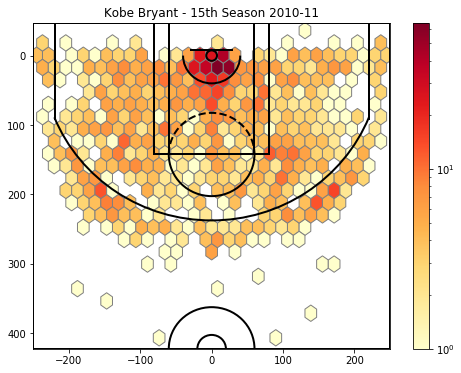

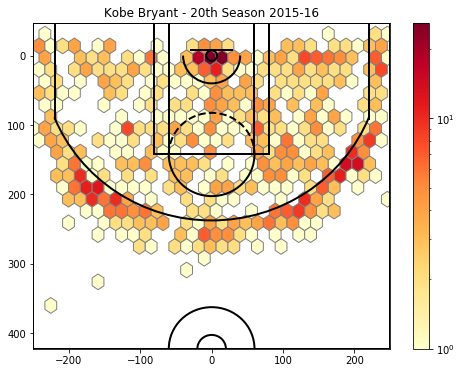

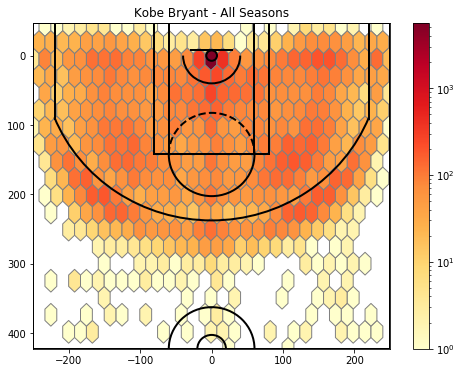

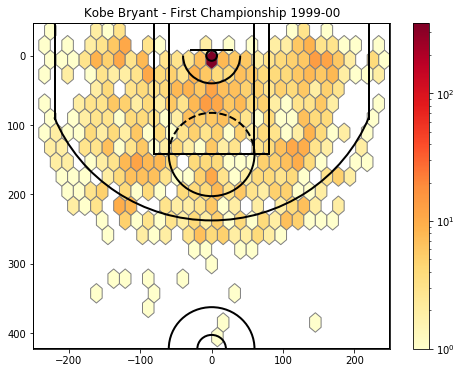

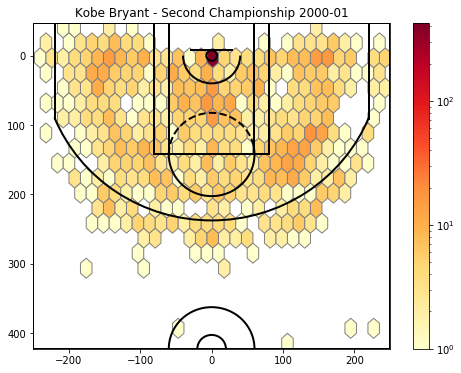

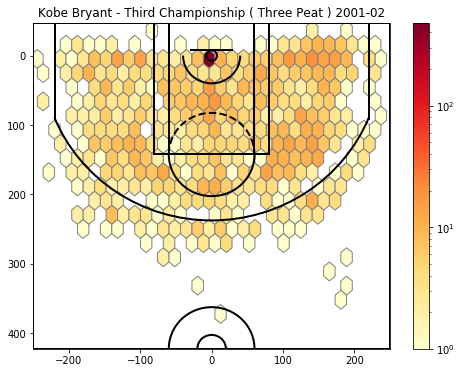

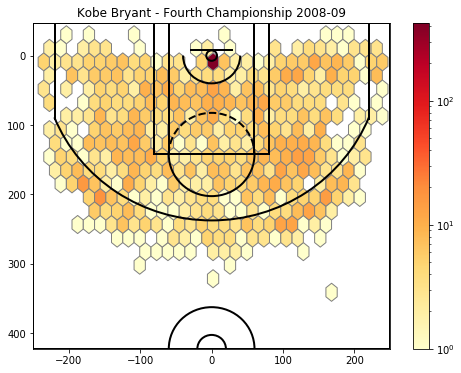

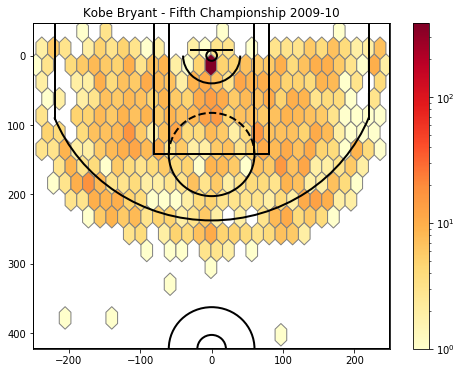

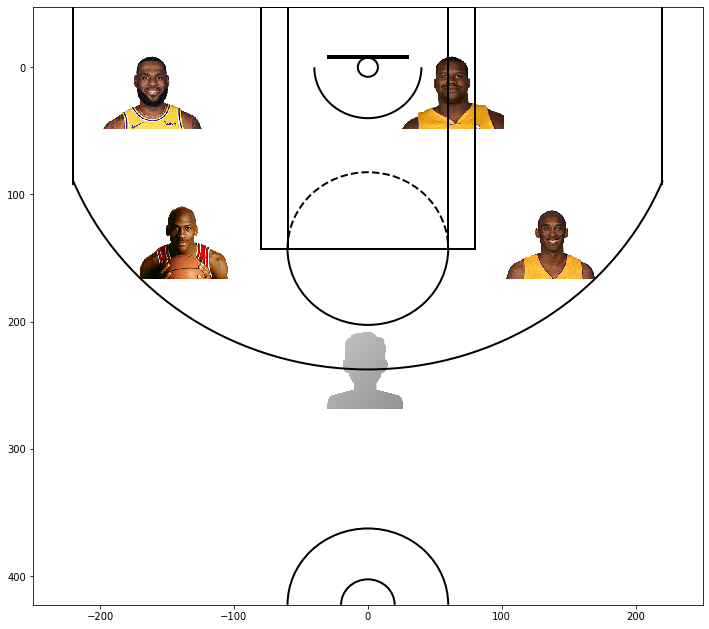

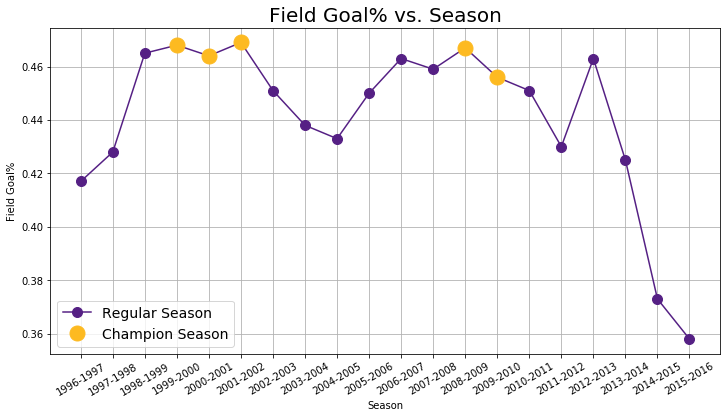

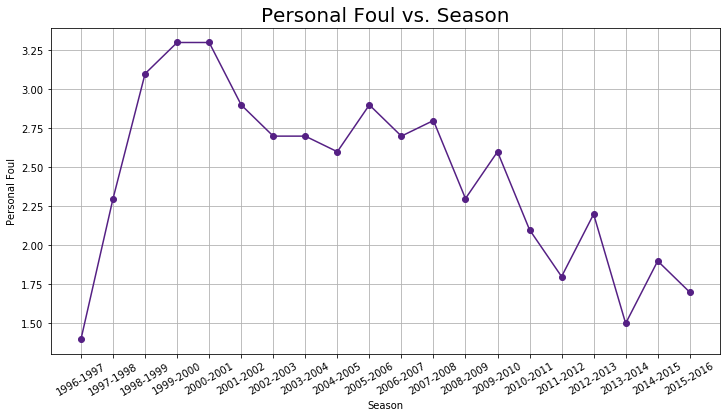

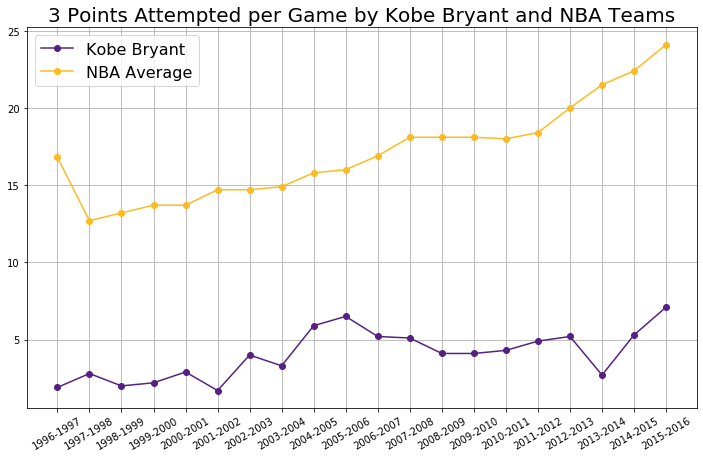

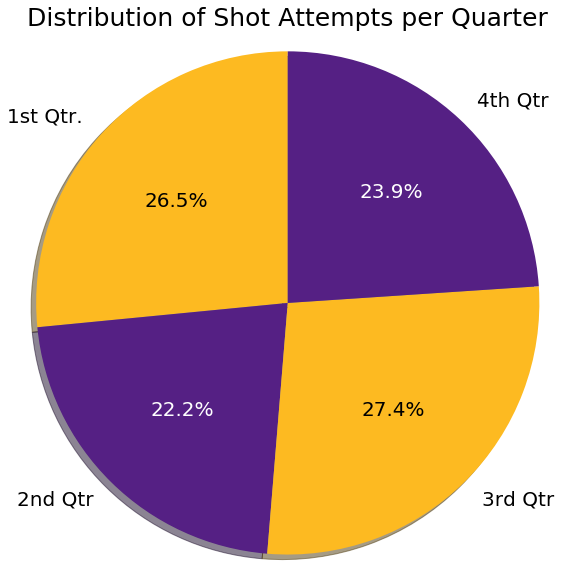

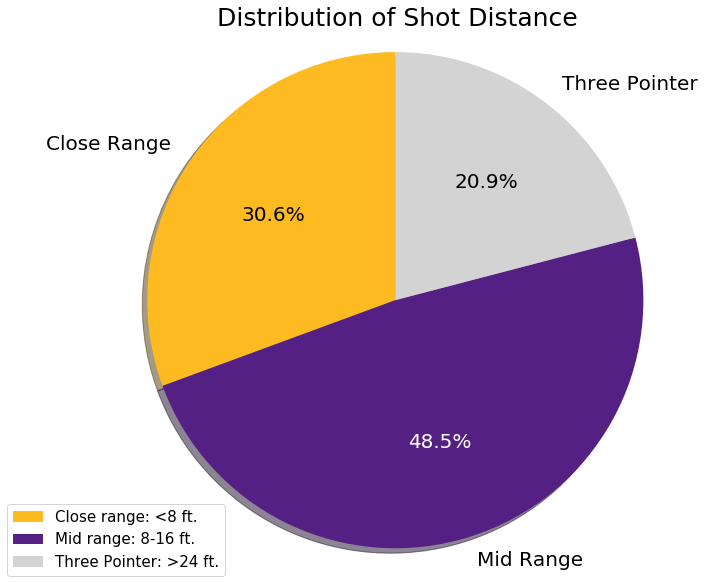

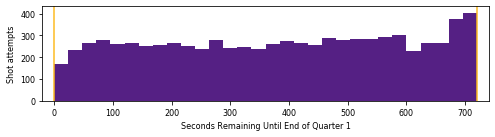

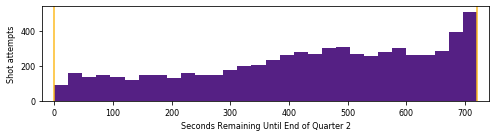

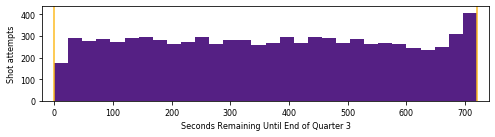

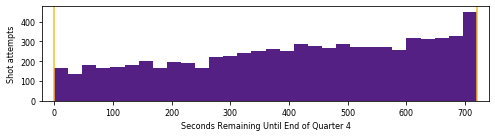

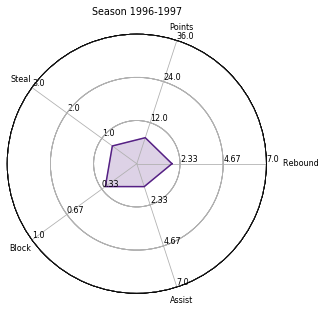

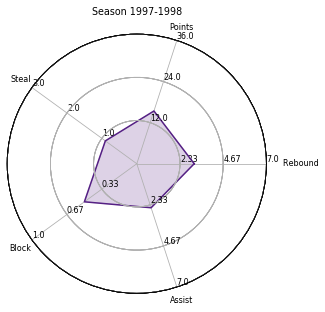

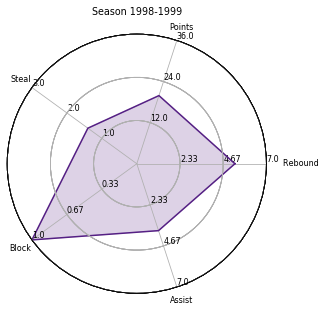

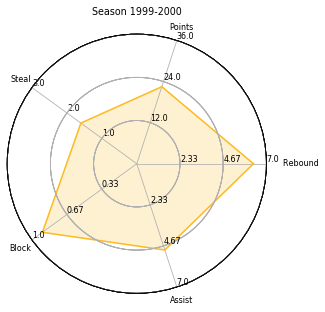

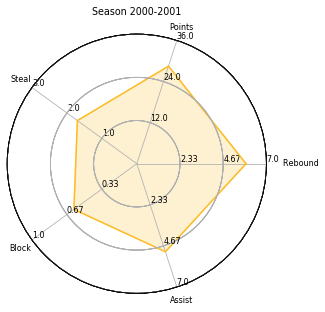

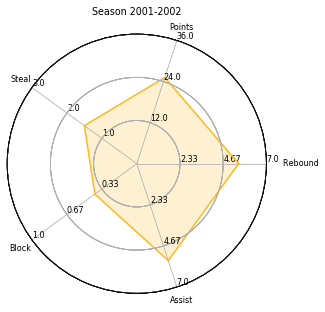

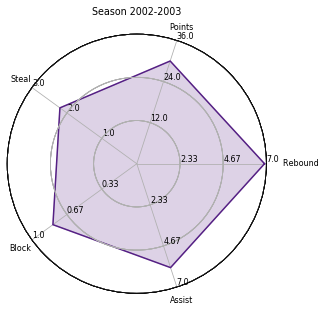

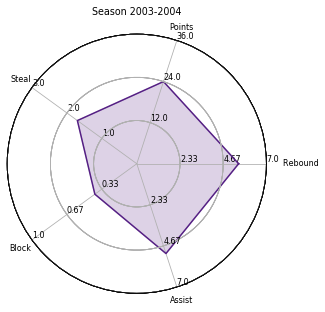

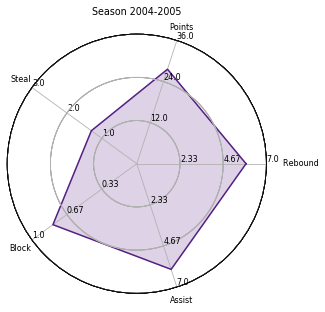

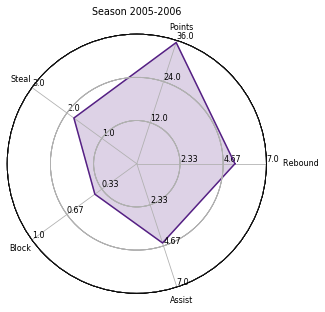

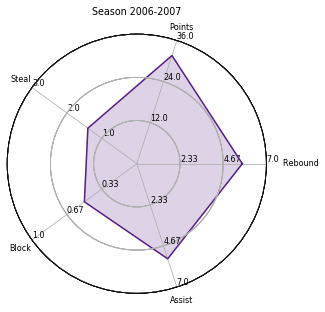

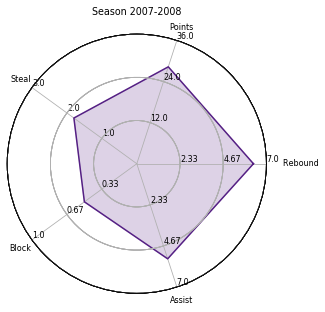

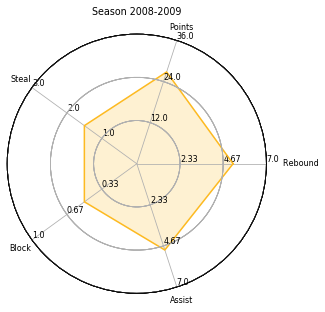

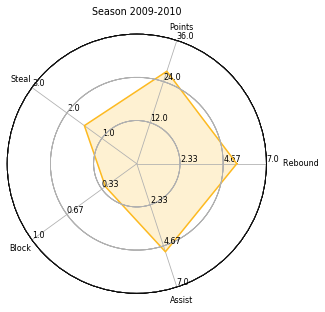

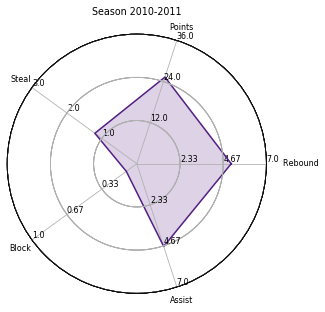

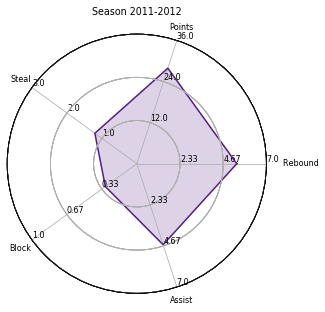

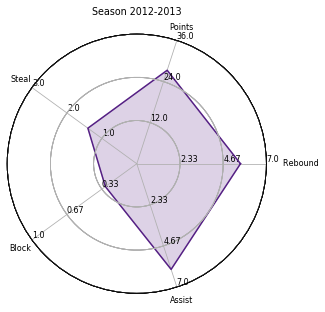

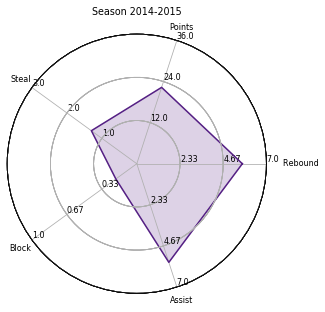

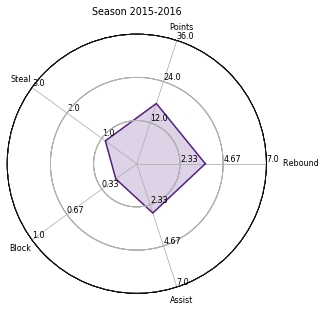

In [16]:
main()